In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3 
import os

In [8]:
# FPL Data
folder_db = '/data/databases/'
folder_raw = '/data/raw_files/'

# Get the directory of the current script
current_directory = os.path.abspath('')


db_path = os.path.join(current_directory + folder_db, "fpl_data.db")
conn = sqlite3.connect(db_path)
df_fpl = pd.read_sql_query('SELECT * FROM fpl_data', conn)
conn.close()

/Users/richard/Desktop/Projects/football-streamlit-app/football-streamlit-app/data/databases/fpl_data.db


In [33]:
data_path = os.path.join(current_directory + folder_raw)
df_test_folder = pd.read_csv(data_path + '/team_ranks.csv')
df_test_folder.head(5)

,rank,name,league,rating,off,def,spi
0,1,Manchester City,Barclays Premier League,100.0,2.79,0.28,92.00
1,2,Liverpool,Barclays Premier League,94.1,2.63,0.67,83.93
2,3,Arsenal,Barclays Premier League,92.8,2.53,0.61,83.92
3,4,Manchester United,Barclays Premier League,92.3,2.35,0.74,79.08
4,5,Newcastle,Barclays Premier League,90.7,2.38,0.53,83.70


In [10]:
pd.set_option('display.max_columns', None)
df_fpl.head(6)
# selected_by_percent
# total_points

,index,second_name,first_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,transfers_out,value_season,bonus,bps,total_points,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,id_x,plural_name,singular_name,pos_short,id_y,name,full_name
0,0,Balogun,Folarin,1,4,0.3,44,0,10024,52995,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,Forwards,Forward,FW,1,Arsenal,Folarin Balogun
1,1,Alves Soares,Cedric,1,2,0.4,39,0,13536,18554,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Defenders,Defender,DF,1,Arsenal,Cedric Alves Soares
2,2,Elneny,Mohamed,1,3,0.1,44,0,5135,9838,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,Midfielders,Midfielder,MF,1,Arsenal,Mohamed Elneny
3,3,Ferreira Vieira,Fabio,1,3,0.1,54,185,8971,9951,3.0,0,45,16,0.41,0.32,0.73,1.41,0.20,0.16,0.36,0.69,3,Midfielders,Midfielder,MF,1,Arsenal,Fabio Vieira
4,4,dos Santos Magalhaes,Gabriel,1,2,12.7,47,384,228409,1885273,3.4,0,82,16,0.07,0.04,0.11,4.20,0.02,0.01,0.03,0.98,2,Defenders,Defender,DF,1,Arsenal,Gabriel Dos Santos
5,5,Havertz,Kai,1,3,1.7,71,446,25572,316855,2.1,0,38,15,1.58,0.50,2.08,4.82,0.32,0.10,0.42,0.97,3,Midfielders,Midfielder,MF,1,Arsenal,Kai Havertz


/Users/richard/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


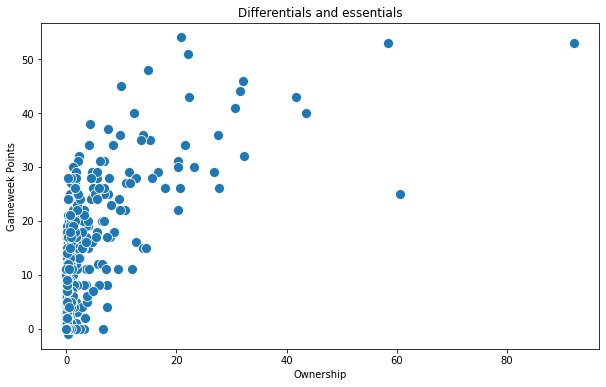

In [17]:
# df_fpl.head(6)
# selected_by_percent
# total_points


df_fpl['selected_by_percent'] = pd.to_numeric(df_fpl['selected_by_percent']) #.astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(df_fpl['selected_by_percent'], df_fpl['total_points'], s=100) #, hue=df_fpl['full_name']
plt.xlabel('Ownership')
plt.ylabel('Gameweek Points')
plt.title('Differentials and essentials')
plt.show()

/Users/richard/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


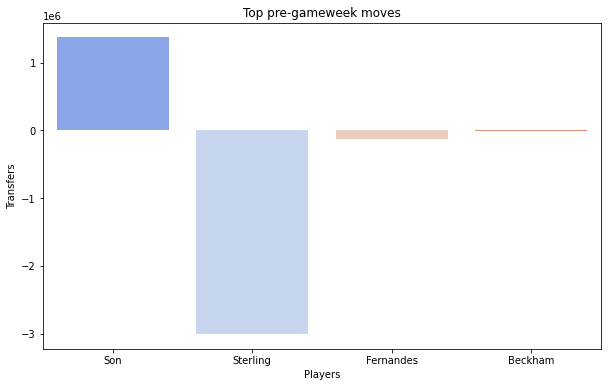

In [23]:
players = ['Son', 'Sterling', 'Fernandes', 'Beckham']
transfers = [1372000, -3005000, -130000, -10000]

plt.figure(figsize=(10, 6))
sns.barplot(players, transfers, palette='coolwarm')
plt.xlabel('Players')
plt.ylabel('Transfers')
plt.title('Top pre-gameweek moves')
plt.show()

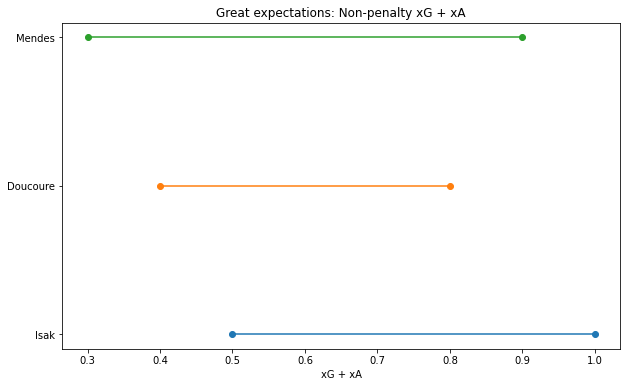

In [19]:
players = ['Isak', 'Doucoure', 'Mendes']
xg_values = [1.0, 0.8, 0.9]
xa_values = [0.5, 0.4, 0.3]

plt.figure(figsize=(10, 6))
for player, xg, xa in zip(players, xg_values, xa_values):
    plt.plot([xg, xa], [player, player], marker='o')
plt.xlabel('xG + xA')
plt.title('Great expectations: Non-penalty xG + xA')
plt.show()

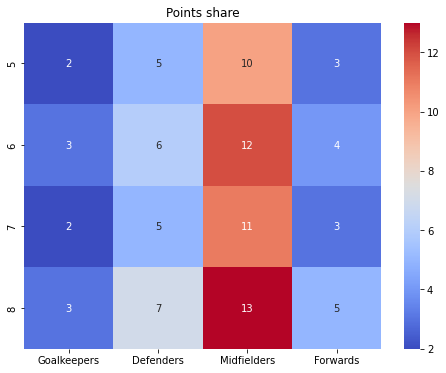

In [24]:
data = {
    'Goalkeepers': [2, 3, 2, 3],
    'Defenders': [5, 6, 5, 7],
    'Midfielders': [10, 12, 11, 13],
    'Forwards': [3, 4, 3, 5]
}
gameweeks = [5, 6, 7, 8]

heatmap_data = pd.DataFrame(data, index=gameweeks)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Points share')
plt.show()

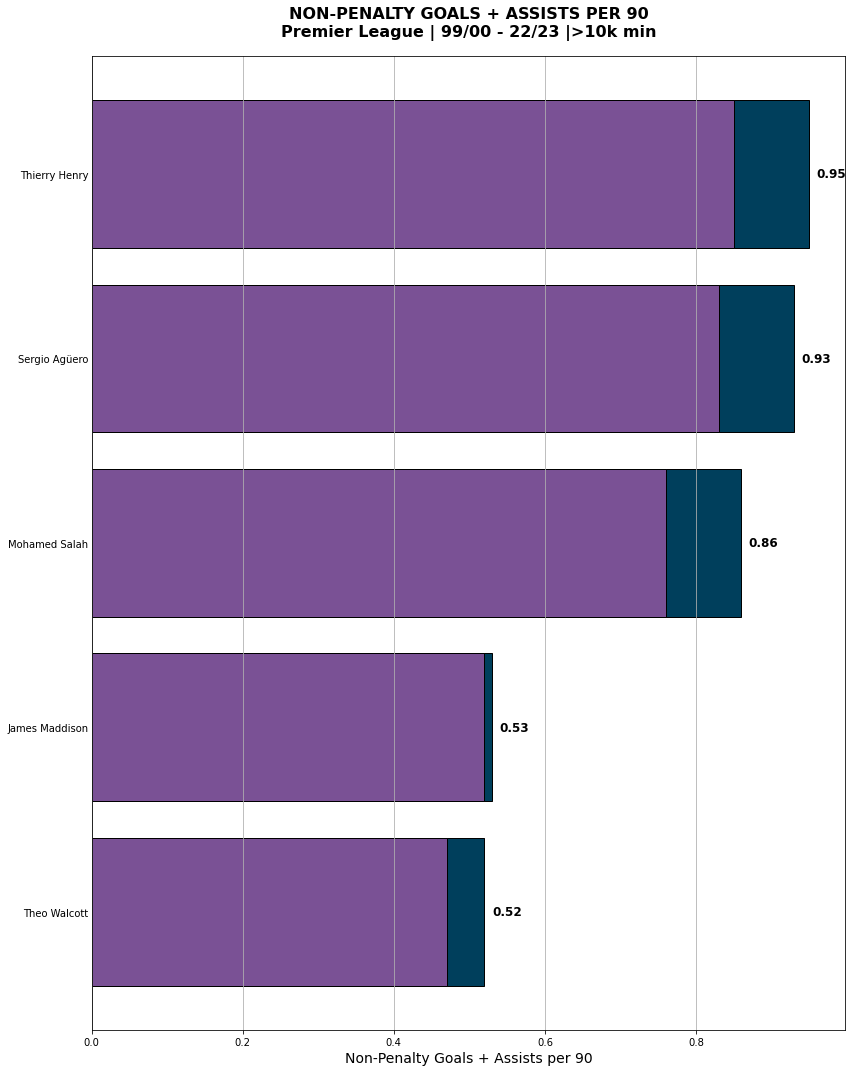

In [25]:
import matplotlib.pyplot as plt

# Sample Data
players = [
    "Thierry Henry", "Sergio Agüero", "Mohamed Salah",
    # ... (add other players here)
    "James Maddison", "Theo Walcott"
]

# Just for this example, I'm assuming the first value is non-penalty goals 
# and the second value is assists. You'll need to adjust these.
non_penalty_goals = [0.85, 0.83, 0.76, 0.52, 0.47]
assists = [0.10, 0.10, 0.10, 0.01, 0.05]

# Plotting
fig, ax = plt.subplots(figsize=(12, 15))

# Stacked Bar Chart
ax.barh(players, non_penalty_goals, color='#7a5195', label='Non-Penalty Goals per 90', edgecolor='black')
ax.barh(players, assists, left=non_penalty_goals, color='#003f5c', label='Assists per 90', edgecolor='black')

# Invert y-axis to have the player with the highest value on top
ax.invert_yaxis()

# Setting title and labels
ax.set_title("NON-PENALTY GOALS + ASSISTS PER 90\nPremier League | 99/00 - 22/23 |>10k min", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Non-Penalty Goals + Assists per 90", fontsize=14)

# Remove y-ticks
ax.tick_params(axis='y', which='both', length=0)
ax.grid(axis='x')

# Display the combined values next to the bars
for i, (g, a) in enumerate(zip(non_penalty_goals, assists)):
    ax.text(g + a + 0.01, i, 
            f"{g + a:.2f}", va='center', ha='left', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


In [27]:
import plotly.graph_objects as go

# Data
players = [
    "Joachim Andersen", "Kieran Trippier", "Benjamin White",
    "William Saliba", "Matty Cash", "Cristian Romero",
    "Marc Guéhi", "Tyrick Mitchell", "Micky van de Ven",
    "Axel Disasi", "Vladimir Coufal", "Levi Colwill",
    "Pedro Porro", "Destiny Udogie", "Pau Torres", "Kyle Walker"
]
points = [51, 49, 45, 36, 36, 36, 35, 34, 34, 34, 33, 33, 32, 32, 31, 31]

gameweeks = ["2", "4", "6", "8"]
scores = [
    [9, 2, 11, 1, 1, 6, 15, 6],
    [2, 2, 0, 1, 8, 18, 12, 6],
    [1, 7, 1, 2, 7, 4, 14, 9],
    [5, 8, 1, 2, 6, 1, 6, 7],
    [-1, 6, 17, -1, 1, 6, 6, 2],
    [7, 6, 7, 7, 2, -2, 1, 8],
    [6, 2, 2, 1, 0, 8, 7, 9],
    [8, 2, 2, 4, 1, 5, 6, 6],
    [1, 7, 6, 1, 1, 1, 2, 15],
    [11, 0, 6, 2, 5, 2, 6, 2],
    [2, 2, 2, 2, 4, 12, 5, 5],
    [2, 2, 1, 6, 2, 6, 2, 12],
    [0, 1, 6, 6, 4, 2, 1, 7],
    [1, 1, 5, 12, 5, 2, 0, 1],
    [0, 0, 6, 2, 1, 2, 8, 2],
    [6, 6, 6, 2, 2, 2, 11, 0]
]

# Creating the heatmap
fig = go.Figure(data=go.Heatmap(
    z=scores,
    x=gameweeks,
    y=[f"{player} ({point} points)" for player, point in zip(players, points)],
    hoverongaps=False,
    colorscale="reds",
    colorbar=dict(title='Points')
))

fig.update_layout(
    title="Points by gameweek: Defenders with over 30 points",
    xaxis_nticks=len(gameweeks),
    yaxis_nticks=len(players),
    xaxis_title="Gameweek",
    yaxis_title=None,
)

fig.show()


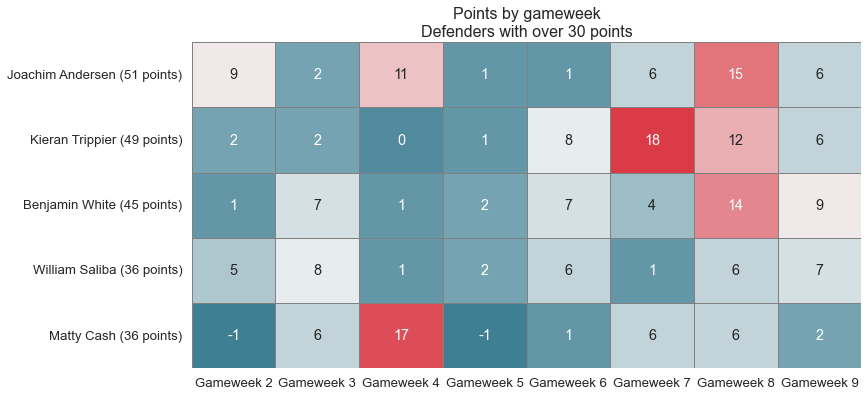

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data setup
players = [
    "Joachim Andersen (51 points)",
    "Kieran Trippier (49 points)",
    "Benjamin White (45 points)",
    "William Saliba (36 points)",
    "Matty Cash (36 points)"
]

gameweek_data = [
    [9, 2, 11, 1, 1, 6, 15, 6],
    [2, 2, 0, 1, 8, 18, 12, 6],
    [1, 7, 1, 2, 7, 4, 14, 9],
    [5, 8, 1, 2, 6, 1, 6, 7],
    [-1, 6, 17, -1, 1, 6, 6, 2]
]

df = pd.DataFrame(gameweek_data, columns=[f"Gameweek {i}" for i in [2, 3, 4, 5, 6, 7, 8, 9]], index=players)

# Plotting
plt.figure(figsize=(12, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Define color palette
sns.set(font_scale=1.2)
sns.heatmap(df, cmap=cmap, annot=True, fmt='g', linewidths=0.5, linecolor='gray', cbar=False)

# Title and display
plt.title("Points by gameweek\nDefenders with over 30 points", size=16)
plt.show()


In [28]:
import plotly.graph_objects as go

# Define the labels and values
labels = ["Non-Penalty Goal", "Big Chances", "Shot Quality", "On Target %", "Off Shots", "Dribbles Completed %", "Pressure Regains", "Turnovers"]
values = [77.4, 75.0, 23.3, 94.4, 57.8, 53.4, 84.6, 88.4]

# Create the plot
fig = go.Figure(data=go.Scatterpolar(
    r=values,
    theta=labels,
    fill='toself',
    name='Shooting'
))

# Set the layout and appearance
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]  # Set the maximum value of the radar chart
        )
    ),
    showlegend=False
)

fig.show()


In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Define the labels and values
labels = ["Non-Penalty Goal", "Big Chances", "Shot Quality", "On Target %", "Off Shots", "Dribbles Completed %", "Pressure Regains", "Turnovers"]

values_shooting = [77.4, 75.0, 23.3, 94.4, 57.8, 53.4, 84.6, 88.4]
values_creating = [72.0, 59.5, 82.3, 83.9, 84.1, 59.9, 78.1, 87.1]

# Create a subplot layout
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Shooting: {np.mean(values_shooting):.1f}', 
                                    f'Creating: {np.mean(values_creating):.1f}'),
                    specs=[[{'type': 'polar'}, {'type': 'polar'}]])

# Add traces for shooting and creating
fig.add_trace(go.Scatterpolar(r=values_shooting, theta=labels, fill='toself', name='Shooting'), row=1, col=1)
fig.add_trace(go.Scatterpolar(r=values_creating, theta=labels, fill='toself', name='Creating'), row=1, col=2)

# Update the layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    polar2=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    showlegend=False
)

fig.show()


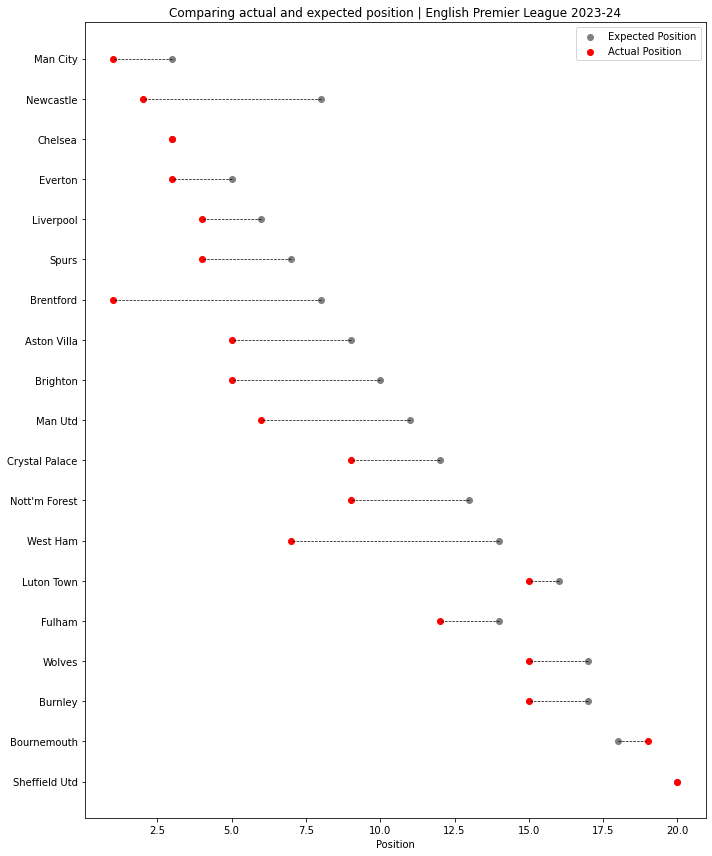

In [1]:
import matplotlib.pyplot as plt

teams = ["Man City", "Newcastle", "Chelsea", "Everton", "Liverpool", "Spurs", "Brentford", "Aston Villa",
         "Brighton", "Man Utd", "Crystal Palace", "Nott'm Forest", "West Ham", "Luton Town", "Fulham",
         "Wolves", "Burnley", "Bournemouth", "Sheffield Utd"]

actual_positions = [1, 2, 3, 3, 4, 4, 1, 5, 5, 6, 9, 9, 7, 15, 12, 15, 15, 19, 20]
expected_positions = [3, 8, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 14, 17, 17, 18, 20]

# Plotting
fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(expected_positions, range(len(teams)), color='gray', label="Expected Position")
ax.scatter(actual_positions, range(len(teams)), color='red', label="Actual Position")
ax.set_yticks(range(len(teams)))
ax.set_yticklabels(teams)
ax.invert_yaxis()  # Reverse y-axis to have top teams at the top
ax.set_xlabel("Position")
ax.set_title("Comparing actual and expected position | English Premier League 2023-24")
ax.legend()

# Draw lines between actual and expected positions
for i, team in enumerate(teams):
    ax.plot([expected_positions[i], actual_positions[i]], [i, i], color='black', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


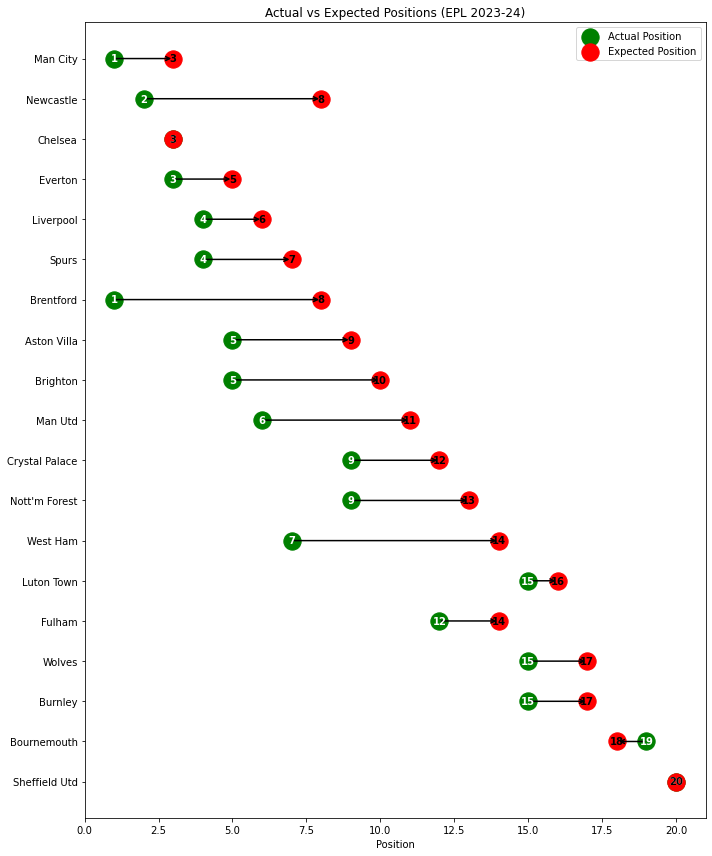

In [13]:
import matplotlib.pyplot as plt

teams = ["Man City", "Newcastle", "Chelsea", "Everton", "Liverpool", "Spurs", "Brentford", "Aston Villa",
         "Brighton", "Man Utd", "Crystal Palace", "Nott'm Forest", "West Ham", "Luton Town", "Fulham",
         "Wolves", "Burnley", "Bournemouth", "Sheffield Utd"]

actual_positions = [1, 2, 3, 3, 4, 4, 1, 5, 5, 6, 9, 9, 7, 15, 12, 15, 15, 19, 20]
expected_positions = [3, 8, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 14, 17, 17, 18, 20]

# Reverse the lists
teams = teams[::-1]
actual_positions = actual_positions[::-1]
expected_positions = expected_positions[::-1]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 12))

# Plot actual positions (in red) and expected positions (in yellow)
ax.scatter(actual_positions, teams, color='green', s=300, label="Actual Position")
ax.scatter(expected_positions, teams, color='red', s=300, label="Expected Position")

# Draw arrows between actual and expected positions
for team, actual, expected in zip(teams, actual_positions, expected_positions):
    ax.annotate("", xy=(expected, team), xytext=(actual, team),
                arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text(actual, team, str(actual), color='white', ha='center', va='center', weight='bold')
    ax.text(expected, team, str(expected), color='black', ha='center', va='center', weight='bold')

# Set labels, title and adjust x-axis
ax.set_xlabel("Position")
ax.set_title("Actual vs Expected Positions (EPL 2023-24)")
ax.set_xlim(0, 21)  # Set x-axis limits from 1 to 20
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [54]:
# Function to calculate xPts
def calculate_xPts(row):
    xG = row['xg']
    xA = row['xga']
    goal_diff = xG - xA
    
    # Adjusting the thresholds and probabilities to closely match the xPts value of 19.31
    if goal_diff > 1.5:
        p_win = 0.9
        p_draw = 0.07
        p_loss = 0.03
    elif goal_diff > 0.5:
        p_win = 0.75
        p_draw = 0.2
        p_loss = 0.05
    elif goal_diff > 0:
        p_win = 0.6
        p_draw = 0.3
        p_loss = 0.1
    else:
        p_win = 0.4
        p_draw = 0.4
        p_loss = 0.2
        
    # Calculating xPts based on the probabilities
    xPts = 3 * p_win + 1 * p_draw
    
    return xPts

In [82]:
import sqlite3
import pandas as pd

folder_db = '/data/databases/'
folder_raw = '/data/raw_files/'

# Get the directory of the current script
current_directory = os.path.abspath('')


db_path = os.path.join(current_directory + folder_db, "fbref_data_team_individual.db")
conn = sqlite3.connect(db_path)
df_individual_xpts = pd.read_sql_query('SELECT * FROM team_individual_tbl', conn)
conn.close()
df_individual_xpts = df_individual_xpts[df_individual_xpts['year'] == '2023-2024']
df_individual_xpts.tail(15)

,index,date,round,venue,result,gf,ga,opponent,xg,xga,possession,xg_roll,xga_roll,team,year
2596,10,2023-11-04 00:00:00,Matchweek 11,Home,L,0.0,1.0,Manchester Utd,1.0,0.7,45,1.01,1.64,Fulham,2023-2024
2597,10,2023-11-04 00:00:00,Matchweek 11,Home,L,0.0,2.0,Crystal Palace,1.1,1.3,67,0.9,1.83,Burnley,2023-2024
2598,10,2023-11-04 00:00:00,Matchweek 11,Home,D,1.0,1.0,Brighton,0.7,0.5,21,1.35,1.22,Everton,2023-2024
2599,10,2023-11-04 00:00:00,Matchweek 11,Home,W,3.0,2.0,West Ham,1.5,1.8,58,1.84,1.34,Brentford,2023-2024
2600,10,2023-11-04 00:00:00,Matchweek 11,Away,L,1.0,6.0,Manchester City,0.9,1.9,35,1.01,2.26,Bournemouth,2023-2024
2601,10,2023-11-04 00:00:00,Matchweek 11,Away,L,0.0,1.0,Newcastle Utd,0.6,1.0,58,1.85,0.76,Arsenal,2023-2024
2602,10,2023-11-04 00:00:00,Matchweek 11,Away,L,1.0,2.0,Sheffield Utd,1.2,1.0,61,1.22,1.65,Wolves,2023-2024
2603,10,2023-11-04 00:00:00,Matchweek 11,Away,W,2.0,0.0,Burnley,1.3,1.1,33,1.02,1.47,Crystal Palace,2023-2024
2604,10,2023-11-04 00:00:00,Matchweek 11,Away,D,1.0,1.0,Everton,0.5,0.7,79,1.53,1.45,Brighton,2023-2024
2605,10,2023-11-05 00:00:00,Matchweek 11,Away,L,0.0,2.0,Nott'ham Forest,1.2,0.4,73,1.87,1.17,Aston Villa,2023-2024


In [55]:
import numpy as np
from scipy.stats import poisson

def simulate_match(xG_home, xG_away, num_simulations=20000):
    # Simulate goals using Poisson distribution
    home_goals = poisson.rvs(mu=xG_home, size=num_simulations)
    away_goals = poisson.rvs(mu=xG_away, size=num_simulations)
    
    # Calculate wins, draws, losses
    home_wins = np.sum(home_goals > away_goals)
    draws = np.sum(home_goals == away_goals)
    away_wins = num_simulations - home_wins - draws
    
    # Calculate probabilities
    win_probability_home = home_wins / num_simulations
    draw_probability = draws / num_simulations
    win_probability_away = away_wins / num_simulations
    
    # Calculate expected points (xPts)
    xPts_home = (win_probability_home * 3.0) + (draw_probability * 1.0)
    xPts_away = (win_probability_away * 3.0) + (draw_probability * 1.0)
    
    return xPts_home, xPts_away

# Example
xG_Brentford = 1.3
xG_Arsenal = 1.4
xPts_Brentford, xPts_Arsenal = simulate_match(xG_Brentford, xG_Arsenal)
print(f"Expected Points for Brentford: {xPts_Brentford:.2f}")
print(f"Expected Points for Arsenal: {xPts_Arsenal:.2f}")


Expected Points for Brentford: 1.30
Expected Points for Arsenal: 1.44


/var/folders/vd/ly4k__lj017dwcj6ngy4n4c00000gn/T/ipykernel_5272/2507096414.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xG Difference'] = df['npxG per 90_x'] - df['npxG per 90_y']


              Squad  npxG per 90_x  npxG per 90_y  xG Difference
0           Arsenal           1.57           0.71           0.86
12  Manchester City           1.71           0.88           0.83
10        Liverpool           1.83           1.15           0.68
14    Newcastle Utd           1.91           1.23           0.68
8           Everton           1.58           1.11           0.47


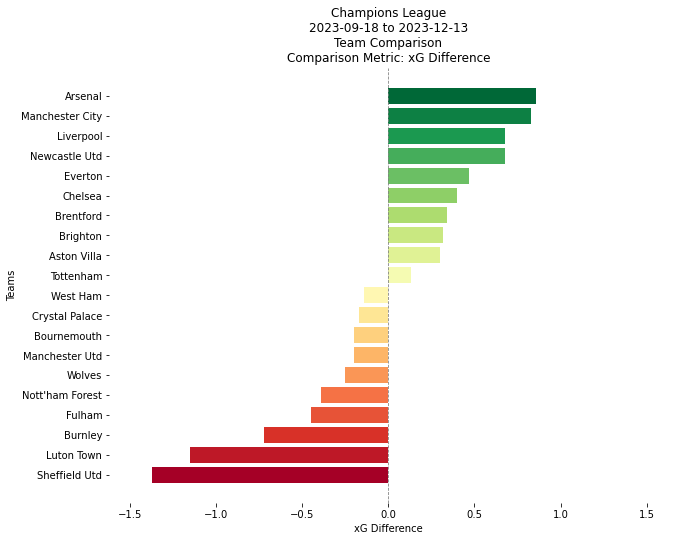

In [104]:

import matplotlib.pyplot as plt
import numpy as np

db_path = os.path.join(current_directory + folder_db, "fbref_for_team_data_overall_2023-2024.db")
conn = sqlite3.connect(db_path)
df1 = pd.read_sql_query('SELECT * FROM teams_for_general', conn)
conn.close()
df1

db_path = os.path.join(current_directory + folder_db, "fbref_against_team_data_overall_2023-2024.db")
conn = sqlite3.connect(db_path)
df2 = pd.read_sql_query('SELECT * FROM teams_against_general', conn)
conn.close()
df2

merged_df_teams = df1.merge(df2, left_on='Squad', right_on='Squad', how='left') 
 

df = merged_df_teams

# Sample data: Team names and their xG Difference
teams = df['Squad'].unique()

cols = ['Squad', 'npxG per 90_x','npxG per 90_y']
df = df[cols]

# Assuming the xG Difference ranges from -14 to 14 as a placeholder
# The actual values should be replaced with the real data
df['xG Difference'] = df['npxG per 90_x'] - df['npxG per 90_y']

# Sort the DataFrame based on 'xG Difference' values
df_sorted = df.sort_values('xG Difference', ascending=False)

print(df_sorted.head(5))

# Now we can use df_sorted to plot our graph
# Extract the sorted teams and their xG difference
sorted_teams = df_sorted['Squad'].values
sorted_xg_difference = df_sorted['xG Difference'].values


# Colors for the bars
colors = [plt.cm.RdYlGn(x) for x in np.linspace(0, 1, len(teams))]

# Create the horizontal bar graph with sorted teams
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_teams[::-1], sorted_xg_difference[::-1], color=colors)

# Determine the max absolute xG difference to set equal limits around zero
max_xg_diff = np.max(np.abs(sorted_xg_difference)) + 0.25

# Set the x-axis limits to be equal on both sides of zero
plt.xlim(-max_xg_diff, max_xg_diff)

# Adding the League Average line
plt.axvline(0, color='grey', linewidth=0.8, linestyle="--")

# Set the title and labels
plt.title('Champions League\n2023-09-18 to 2023-12-13\nTeam Comparison\nComparison Metric: xG Difference')
plt.xlabel('xG Difference')
plt.ylabel('Teams')

# # Set the y-ticks to team names
# plt.yticks(np.arange(len(teams)), teams)

# Remove the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Show the plot
plt.show()


In [106]:
# Bring in weekly fpl data
current_dir = os.getcwd()
new_directory = os.path.join(current_dir, "data", "databases")
db_name = os.path.join(new_directory, 'fpl_data_weekly.db')
table_name = 'general_data'
conn = sqlite3.connect(db_name)
df_weekly_fpl = pd.read_sql_query(f'SELECT * FROM {table_name}', conn)
conn.close()


df_weekly_fpl.head(5)

,index,element,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,selected,transfers_in,transfers_out,full_name,id_x
0,0,308,5,76,0,1,0,1,0,0,...,1,0.28,0.31,0.59,1.28,2243674,0,0,Mohamed Salah,308
1,1,308,5,85,1,0,0,1,0,0,...,1,1.23,0.11,1.34,1.00,2739755,211617,48553,Mohamed Salah,308
2,2,308,5,90,0,1,0,1,0,0,...,1,0.18,0.12,0.30,2.00,2570086,98738,328035,Mohamed Salah,308
3,3,308,8,90,1,0,1,0,0,0,...,1,0.80,0.07,0.87,0.66,2505698,74612,197028,Mohamed Salah,308
4,4,308,10,90,0,2,0,1,0,0,...,1,0.24,1.47,1.71,0.63,2540130,117182,139826,Mohamed Salah,308


/var/folders/vd/ly4k__lj017dwcj6ngy4n4c00000gn/T/ipykernel_5272/1717145060.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_8_weeks['expected_goals'] = df_last_8_weeks['expected_goals'].astype(float)
/var/folders/vd/ly4k__lj017dwcj6ngy4n4c00000gn/T/ipykernel_5272/1717145060.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_8_weeks['expected_assists'] = df_last_8_weeks['expected_assists'].astype(float)


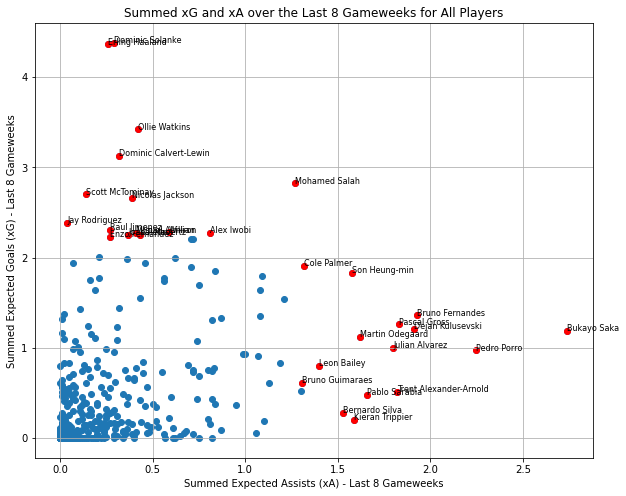

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = df_weekly_fpl

# Assign gameweeks correctly by using a groupby operation on 'element'
# and using the cumulative count within each group as the gameweek number
df['gameweek'] = df.groupby('element').cumcount() + 1

# Find the maximum gameweek for each element (player)
max_gameweeks = df.groupby('element')['gameweek'].transform('max')

# Filter to get the rows for the last 8 gameweeks for each player
df_last_8_weeks = df[(max_gameweeks - df['gameweek']) < 6]

# Group by 'full_name' and sum the 'expected_goals' and 'expected_assists'

df_last_8_weeks['expected_goals'] = df_last_8_weeks['expected_goals'].astype(float)
df_last_8_weeks['expected_assists'] = df_last_8_weeks['expected_assists'].astype(float)
player_xg_xa_last_8 = df_last_8_weeks.groupby('full_name')[['expected_goals', 'expected_assists']].sum().reset_index()


# Identifying the top 10 players based on xG and xA
top_10_xg = player_xg_xa_last_8.nlargest(15, 'expected_goals')
top_10_xa = player_xg_xa_last_8.nlargest(15, 'expected_assists')



# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(player_xg_xa_last_8['expected_assists'], player_xg_xa_last_8['expected_goals'])

# Highlight the top 10 players in xG and xA in red
plt.scatter(top_10_xg['expected_assists'] , top_10_xg['expected_goals'], color='red', label='Top 15 xG')
plt.scatter(top_10_xa['expected_assists'], top_10_xa['expected_goals'],  color='red', label='Top 15 xA')


# Adding names to the highlighted points
for i, row in top_10_xg.iterrows():
    plt.text(row['expected_assists'], row['expected_goals'],  row['full_name'], fontsize=8)
for i, row in top_10_xa.iterrows():
    plt.text(row['expected_assists'], row['expected_goals'],  row['full_name'], fontsize=8)



# Adding labels and title
plt.xlabel('Summed Expected Assists (xA) - Last 8 Gameweeks')
plt.ylabel('Summed Expected Goals (xG) - Last 8 Gameweeks')
plt.title('Summed xG and xA over the Last 8 Gameweeks for All Players')

# Show plot with a grid for better readability
plt.grid(True)
plt.show()


In [137]:
folder_db = '/data/databases/'
folder_raw = '/data/raw_files/'

pd.set_option('display.max_columns', None)

# current_dir = os.getcwd()
# new_directory = os.path.join(current_dir, "data", "databases")
# db_name = os.path.join(new_directory, 'fpl_data_weekly.db')
# table_name = 'general_data'
# conn = sqlite3.connect(db_name)
# df_weekly_fpl = pd.read_sql_query(f'SELECT * FROM {table_name}', conn)
# conn.close()

# Get the directory of the current script
current_dir = os.getcwd()
# Generate the path to the database
db_path = os.path.join(current_directory + folder_db, "fbref_data_players_latest.db")
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Write a SQL query to join all the tables
query = """
SELECT *
FROM general
LEFT JOIN keepers ON general.Player = keepers.Player
LEFT JOIN keepers_adv ON general.Player = keepers_adv.Player
LEFT JOIN shooting ON general.Player = shooting.Player
LEFT JOIN passing ON general.Player = passing.Player
LEFT JOIN passing_types ON general.Player = passing_types.Player
LEFT JOIN gca ON general.Player = gca.Player
LEFT JOIN defense ON general.Player = defense.Player
LEFT JOIN possession ON general.Player = possession.Player
LEFT JOIN playingtime ON general.Player = playingtime.Player
LEFT JOIN misc ON general.Player = misc.Player
"""

# Execute the query and load the result into a DataFrame
current_players = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

df_player = current_players.drop(columns=['index'])
duplicated_columns = df_player.columns[df_player.columns.duplicated()].tolist()
df_player = df_player.loc[:, ~df_player.columns.duplicated()]

test_df = df_player #df_player[df_player['Player'] == 'Douglas Luiz']
test_df[test_df['Player'] == 'Douglas Luiz']

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,Progressive Carries,Progressive Passes,PrgR,Gls per 90,Ast per 90,G+A per 90,G-PK per 90,G+A-PK per 90,xG per 90,xAG per 90,xG+xAG,npxG per 90,npxG+xAG per 90,season_years,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKA,PKsv,PKm,Save%.1,FK,CK,OG,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp,Att,Cmp%,Att (GK),Thr,Launch%,AvgLen,Att.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Sh,SoT,SoT Pct,Sh per 90,SoT per 90,Goals per Shot,Goals per SoT,Average Shot Distance,npxG per Shot,G-xG,npG - npxG,Passes Completed,Passes Attempted,Pass Completion Pct,Total Passing Dist,Progressive Passing Dist,Passes Completed (Short),Passes Attempted (Short),Pass Completion Pct (Short),Passes Completed (Medium),Passes Attempted (Medium),Pass Completion Pct (Medium),Passes Completed (Long),Passes Attempted (Long),Pass Completion Pct (Long),xA,A-xAG,Key Passes,Passes Into Final Third,Passes Into Pen Area,Crosses Into Pen Area,Live-ball Passes,Dead-ball Passes,Passes from FK,Through Balls,Switches,Crosses,Throw-Ins,Corner Kicks,Inswinging CK,Outswinging CK,Straight CK,Passes Offside,Passes Blocked,Shot Creating Actions,Shot Creating Actions per 90,SCA PassLive,SCA PassDead,SCA Take-ons,SCA Shots,SCA Fouled,SCA Defensive Actions,Goal Creating Actions,Goal Creating Actions per 90,GCA PassLive,GCA PassDead,GCA Take-ons,GCA Shots,GCA Fouled,GCA Defensive Actions,Tackles,Tackles Won,Tackles Def 3rd,Tackles Mid 3rd,Tackles Att 3rd,Dribblers Tackled,Dribblers Challenged,Dribblers Tackled Pct,Dribblers Challenged Lost,Blocks,Shots Blocked,Interceptions,Tackles and Interceptions,Clearances,Errors Leading to Shots,Touches,Touches (Def Pen),Touches (Def 3rd),Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Touches (Live-Ball),Take-Ons Attempted,Successful Take-Ons,Successful Take-On %,Times Tackled During Take-Ons,Tackled During Take-On %,Carries,Total Carrying Distance,Progressive Carrying Distance,Carries Into Final 3rd,Carries Into Penalty Area,Miscontrols,Disposessed,Passes Recieved,Progressive Passes Receieved,Mins,Minutes per Matches Played,Minutes Played Pct,Minutes Per Start,Complete Matches Played,Sub Apps,Minutes Per Sub,Unused Subs,Points Per Match,Goals Scored (On Pitch),Goals Allowed (On Pitch),Scored Minus Allowed (On Pitch),Scored Minus Allowed (On Pitch) per 90,Scored Minus Allowed Net (On Pitch) per 90,xG (On Pitch),xGA (On Pitch),xG Minus xGA (On Pitch),xG Minus xGA (On Pitch) per 90,xG Minus xGA Net (On Pitch) per 90,2CrdY,Fouls,Fouled,Offsides,PK Won,PK Conceded,Own Goals,Balls Recovered,Aerial Duels Won,Aerial Duels Lost,Aerial Duels Win Pct
132,266,Douglas Luiz,BRA,MF,Aston Villa,25.0,1998.0,16.0,16.0,1383.0,15.4,5.0,2.0,7.0,2.0,3.0,3.0,5.0,0.0,4.1,1.8,1.9,3.7,35.0,76.0,28.0,0.33,0.13,0.46,0.13,0.26,0.27,0.12,0.39,0.12,0.24,2023-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,6.0,22.2,1.76,0.39,0.07,0.33,24.8,0.07,0.9,0.2,863.0,1013.0,85.2,15380.0,3805.0,365.0,397.0,91.9,383.0,436.0,87.8,95.0,145.0,65.5,2.0,0.1,22.0,69.0,19.0,3.0,900.0,112.0,61.0,4.0,11.0,52.0,5.0,46.0,30.0,1.0,2.0,1.0,9.0,61.0,3.97,31.0,17.0,3.0,7.0,2.0,1.0,5.0,0.33,3.0,2.0,0.0,0.0,0.0,0.0,36.0,24.0,14.0,15.0,7.0,16.0,30.0,53.3,14.0,18.0,5.0,10.0,46.0,13.0,0.0,1155.0,47.0,241.0,630.0,294.0,23.0,1152.0,23.0,12.0,52.2,7.0,30.4,669.0,3633.0,1712.0,23.0,2.0,19.0,10.0,782.0,28.0,1383.0,86.0,90.4,86.0,11.0,0.0,0.0,0.0,2.19,34.0,20.0,14.0,0.91,-0.31,28.1,21.5,6.6,0.43,-0.08,0.0,21.0,21.0,0.0,0.0,0.0,0.0,101.0,11.0,8.0,57.9


In [176]:
from scipy.stats import percentileofscore
df = test_df
player_of_interest = 'Ezri Konsa'

# att_attr = ['G-PK','npxG','Ast','xAG','npxG+xAG','Sh','Shot Creating Actions', 'Progressive Passes', 'PrgR']
att_attr = ['G-PK','npxG','Ast','xAG','Sh', 'Shot Creating Actions', 'Progressive Passes', 'PrgR']
# pos_attr = ['Touches', 'Successful Take-Ons', 'Successful Take-On %','Carries', 'Progressive Carrying Distance', 
#                     'Progressive Carries', 'Miscontrols', 'Disposessed', 'Passes Recieved']
pos_attr = ['Touches', 'Successful Take-Ons', 'Progressive Carries', 'Disposessed', 'Passes Recieved']
# def_attr = ['Tackles Won', 'Dribblers Tackled', 'Dribblers Tackled Pct', 'Blocks', 'Shots Blocked', 'Passes Blocked',
#                     'Tackles and Interceptions', 'Errors Leading to Shots', 'Aerial Duels Won', 'Aerial Duels Win Pct']
def_attr = ['Tackles Won', 'Blocks', 'Shots Blocked', 'Tackles and Interceptions', 'Aerial Duels Won']

attributes = att_attr + pos_attr + def_attr

print(len(att_attr))
print(len(pos_attr))
print(len(def_attr))

player_position = df[df['Player'] == player_of_interest]['Pos'].values[0]
position_df = df[df['Pos'] == player_position]
player_values = df[df['Player'] == player_of_interest][attributes].values.flatten()

merged_df_per_90 = position_df.copy()
percentile_values = [percentileofscore(merged_df_per_90[attribute], player_value) / 100 
                        for attribute, player_value 
                        in zip(attributes, player_values)]
# percentile_values = percentile_values 
# percentile_values = [ '%.0f' % elem for elem in percentile_values ]
percentile_values = [ elem * 100 for elem in percentile_values ]
percentile_values = [ '%.0f' % elem for elem in percentile_values ]
percentile_values = list(percentile_values)
# percentile_values += percentile_values[:1]

# We will also add the first player value to the end of the list for the labels
player_values = list(player_values)
player_values += player_values[:1]

values2 = [70, 77, 74, 68, 60, 96, 89, 97, 92, 94, 16, 19, 56, 53, 94]

for i in range(0, len(percentile_values)): 
    percentile_values[i] = int(percentile_values[i]) 

print(len(attributes))
print(len(percentile_values))
print(percentile_values)
print(player_values)

print(type(percentile_values))
print(type(values2))

8
5
5
18
18
[35, 97, 32, 32, 81, 62, 86, 61, 90, 93, 65, 75, 91, 89, 87, 86, 90, 67]
[0.0, 1.5, 0.0, 0.1, 8.0, 12.0, 56.0, 12.0, 1146.0, 10.0, 12.0, 5.0, 800.0, 18.0, 20.0, 11.0, 47.0, 15.0, 0.0]
<class 'list'>
<class 'list'>


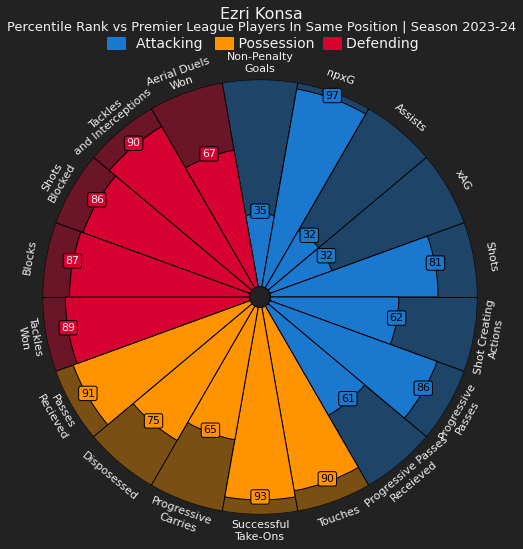

In [192]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager


# parameter list
params = attributes
name_update = {
    "G-PK": "Non-Penalty\nGoals", 
    "Sh": "Shots", 
    "Ast": "Assists",
    "Shot Creating Actions": "Shot Creating\nActions",
    "Progressive Passes": "Progressive\nPasses",
    "PrgR": "Progressive Passes\nReceieved",
    "Successful Take-Ons": "Successful\nTake-Ons",
    "Progressive Carries": "Progressive\nCarries",
    "Passes Recieved": "Passes\nRecieved",
    "Tackles Won": "Tackles\nWon",
    "Shots Blocked": "Shots\nBlocked",
    "Tackles and Interceptions": "Tackles\nand Interceptions",
    "Aerial Duels Won": "Aerial Duels\nWon",
}

params_updated = [name_update.get(param, param) for param in params]

# value list
values = percentile_values

slice_colors = ["#1A78CF"] * 8 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 13 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params_updated,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=5            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 8),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.985, f"{player_of_interest}", size=16,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.965,
    "Percentile Rank vs Premier League Players In Same Position | Season 2023-24",
    size=13,
    ha="center", color="#F2F2F2"
)

# add text
fig.text(
    0.34, 0.935, "Attacking        Possession       Defending", size=14, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.30, 0.9325), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.45, 0.9325), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.60, 0.9325), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

plt.show()

In [198]:

import matplotlib.pyplot as plt
import numpy as np

db_path = os.path.join(current_directory + folder_db, "fbref_for_team_data_overall_2023-2024.db")
conn = sqlite3.connect(db_path)
df1 = pd.read_sql_query('SELECT * FROM teams_for_general', conn)
conn.close()
df1

db_path = os.path.join(current_directory + folder_db, "fbref_against_team_data_overall_2023-2024.db")
conn = sqlite3.connect(db_path)
df2 = pd.read_sql_query('SELECT * FROM teams_against_general', conn)
conn.close()
df2

merged_df_teams = df1.merge(df2, left_on='Squad', right_on='Squad', how='left') 
 

db_path = os.path.join(current_directory + folder_db, "fbref_data_team_individual.db")
conn = sqlite3.connect(db_path)
df_individual = pd.read_sql_query('SELECT * FROM team_individual_tbl', conn)
conn.close()


df = df_individual

In [200]:
df = df[df['year']=='2023-2024']
df.head(5)

,index,date,round,venue,result,gf,ga,opponent,xg,xga,possession,xg_roll,xga_roll,team,year
2391,0,2023-08-11 00:00:00,Matchweek 1,Home,L,0.0,3.0,Manchester City,0.3,1.9,35,None,None,Burnley,2023-2024
2392,0,2023-08-11 00:00:00,Matchweek 1,Away,W,3.0,0.0,Burnley,1.9,0.3,65,None,None,Manchester City,2023-2024
2393,0,2023-08-12 00:00:00,Matchweek 1,Away,L,1.0,4.0,Brighton,1.5,4.0,30,None,None,Luton Town,2023-2024
2394,0,2023-08-12 00:00:00,Matchweek 1,Home,W,2.0,1.0,Nott'ham Forest,0.8,1.2,78,None,None,Arsenal,2023-2024
2395,0,2023-08-12 00:00:00,Matchweek 1,Home,L,0.0,1.0,Crystal Palace,0.5,1.9,32,None,None,Sheffield Utd,2023-2024


/var/folders/vd/ly4k__lj017dwcj6ngy4n4c00000gn/T/ipykernel_5272/3581290823.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df.groupby('team').apply(lambda x: x.tail(num_matches).mean()).reset_index()


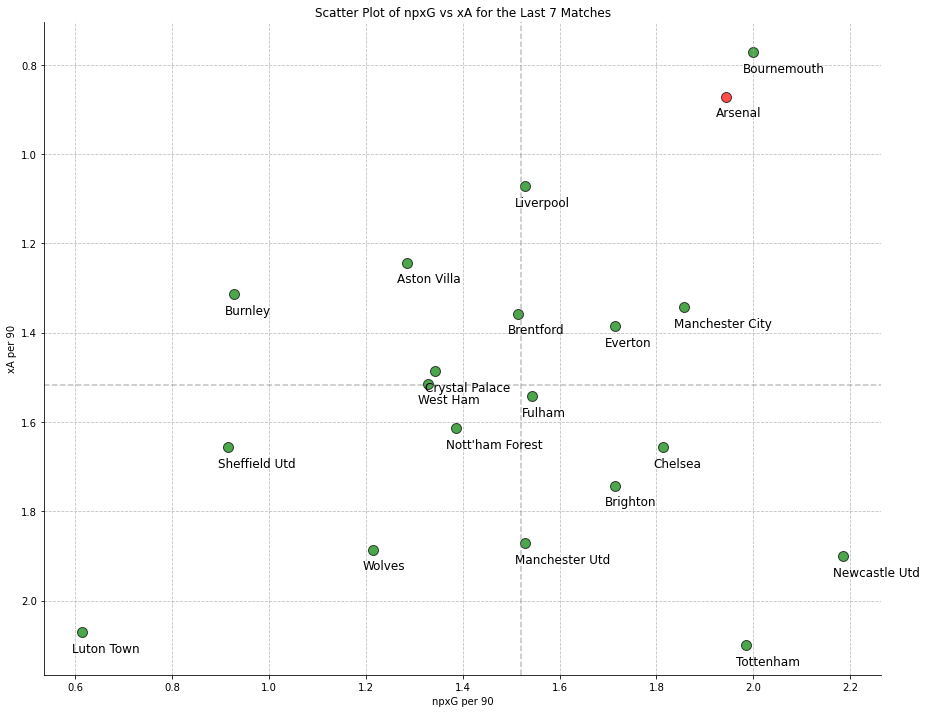

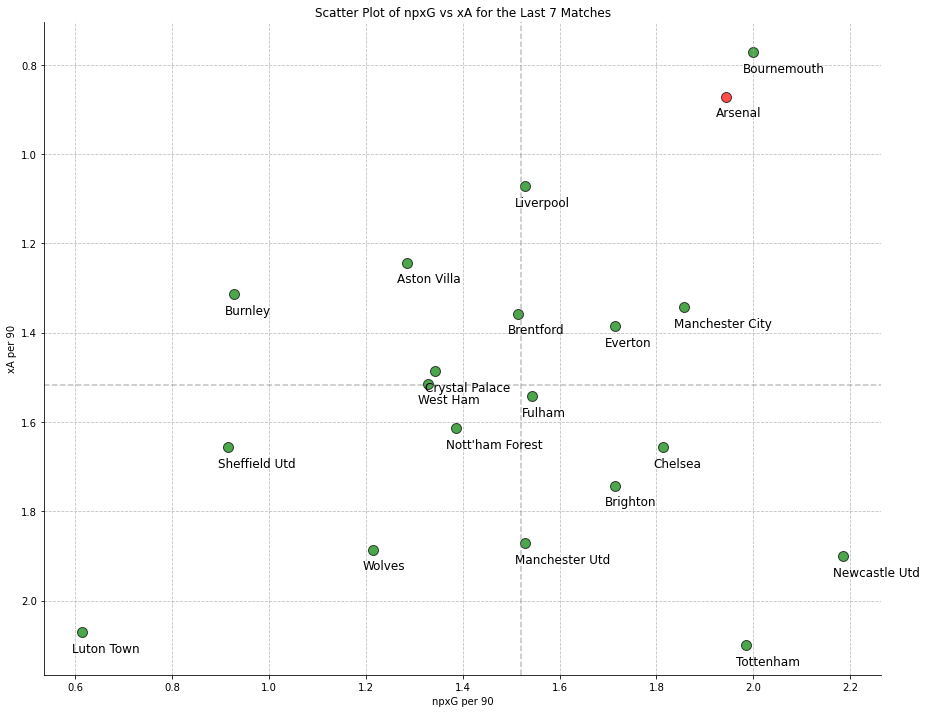

In [204]:
def get_last_matches_stats(df, num_matches):
    # Filter the last 'num_matches' for each team and calculate the average
    return df.groupby('team').apply(lambda x: x.tail(num_matches).mean()).reset_index()

def plot_team_scatter_filtered(df, highlight_team, num_matches):
    df = df[df['year']=='2023-2024']
    # Filter data based on selected number of matches for each team
    filtered_df = get_last_matches_stats(df, num_matches)


    fig, ax = plt.subplots(figsize=(15, 12))
    ax.grid(True, linestyle='--', alpha=0.8)

    for i in range(len(filtered_df)):
        color = 'red' if filtered_df['team'][i] == highlight_team else 'green'

        ax.scatter(filtered_df['xg'][i], 
                   filtered_df['xga'][i], 
                   s=100,
                   c=color,
                   edgecolor='black',
                   alpha=0.7)

        ax.annotate(filtered_df['team'][i],
                    (filtered_df['xg'][i], filtered_df['xga'][i]),
                    xytext=(-10, -20),
                    textcoords='offset points',
                    fontsize=12)

    npxG_avg = filtered_df['xg'].mean()
    xA_avg = filtered_df['xga'].mean()
    plt.axhline(npxG_avg, color='grey', linestyle='--', alpha=0.5)
    plt.axvline(xA_avg, color='grey', linestyle='--', alpha=0.5)

    ax.set_title('Scatter Plot of npxG vs xA for the Last ' + str(num_matches) + ' Matches')
    ax.set_xlabel('npxG per 90')
    ax.set_ylabel('xA per 90')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.invert_yaxis()

    return fig

num_matches = 7
team_of_interest = "Arsenal"


plot_team_scatter_filtered(df, team_of_interest, num_matches)

In [205]:
folder_db = '/data/databases/'
folder_raw = '/data/raw_files/'

# Get the directory of the current script
current_dir = os.getcwd()
# Generate the path to the database
db_path = os.path.join(current_directory + folder_db, "fbref_data_players_latest.db")
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Write a SQL query to join all the tables
query = """
SELECT *
FROM general
LEFT JOIN keepers ON general.Player = keepers.Player
LEFT JOIN keepers_adv ON general.Player = keepers_adv.Player
LEFT JOIN shooting ON general.Player = shooting.Player
LEFT JOIN passing ON general.Player = passing.Player
LEFT JOIN passing_types ON general.Player = passing_types.Player
LEFT JOIN gca ON general.Player = gca.Player
LEFT JOIN defense ON general.Player = defense.Player
LEFT JOIN possession ON general.Player = possession.Player
LEFT JOIN playingtime ON general.Player = playingtime.Player
LEFT JOIN misc ON general.Player = misc.Player
"""

# Execute the query and load the result into a DataFrame
current_players = pd.read_sql_query(query, conn)

# Close the connection
conn.close()



current_players.to_csv('current_players_data.csv')

In [ ]:
# Used to calculate rolling xg and xa
db_path = os.path.join(current_directory + folder_db, "fbref_data_team_individual.db")
conn = sqlite3.connect(db_path)
df_individual = pd.read_sql_query('SELECT * FROM team_individual_tbl', conn)
conn.close()

df_individual.to_csv('team_rolling_xg.csv')